In [1]:
#below classes we used to interact with any llm model
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langchain_huggingface import ChatHuggingFace,HuggingFaceEndpoint

#to convert the simple user query to Prompt we are using Chatprompttemplate,prompttemplate
from langchain_core.prompts import PromptTemplate,ChatPromptTemplate

#parser classes to parser 
from langchain_core.output_parsers import StrOutputParser,PydanticOutputParser

#loading the env filter
from dotenv import load_dotenv

from langchain_core.messages import ToolMessage,AIMessage,HumanMessage,SystemMessage

load_dotenv()

True

In [2]:
#creating an object of chatGroq class
model1 = ChatGroq(
    model="llama-3.1-8b-instant",temperature=0 #temperature is called creative parameter
)

#creating an object openai model class
model2 = ChatOpenAI(
    model="gpt-3.5-turbo",temperature=0
)

#creating an object open source model.
#HuggingFaceEndpoint is a class where we are sending or hitting user query request to get response
llm = HuggingFaceEndpoint(  
        repo_id="meta-llama/Meta-Llama-3-8B-Instruct",  
        task="text-generation",  
        )  
model3 = ChatHuggingFace(llm=llm)

Each message can be supplied with a few things:

content - content of the message
name - optionally, a message author
response_metadata - optionally, a dict of metadata (e.g., often populated by model provider for AIMessages)

# below is the kind of few shot prompting technique where we give  LLM model chat history with example

In [3]:
from pprint import pprint

#creating a list of messages holding/storing human and ai message init.
messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]

messages.append(HumanMessage(content=f"Yes, that's right.",name="user"))

messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))

messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="user"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: user

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: user

I want to learn about the best place to see Orcas in the US.


In [4]:
# now passing the few shot prompting to llm chat model to give reposne based on context of messages.

# chat Models

In [5]:
response = model1.invoke(messages)
response

AIMessage(content='The best place to see Orcas (also known as killer whales) in the US is in the Pacific Northwest, particularly in the waters around Washington state and British Columbia, Canada. \n\nSome popular locations for orca sightings include:\n\n1. **Puget Sound**: Specifically, the San Juan Islands, which are located between the mainland and Vancouver Island. This area is home to the Southern Resident orcas, a distinct population of orcas that feed on salmon.\n2. **San Juan Islands National Wildlife Refuge**: This refuge is a protected area that provides a safe habitat for orcas and other marine wildlife.\n3. **Olympic National Park**: Located on the Olympic Peninsula in Washington state, this park offers orca sightings in the Pacific Ocean and surrounding waters.\n4. **Neah Bay**: Located on the Olympic Peninsula, Neah Bay is a popular spot for orca sightings, particularly during the summer months.\n\nThe best time to see orcas in these locations is during the summer months 

In [6]:
# to show the content from response
response.content

'The best place to see Orcas (also known as killer whales) in the US is in the Pacific Northwest, particularly in the waters around Washington state and British Columbia, Canada. \n\nSome popular locations for orca sightings include:\n\n1. **Puget Sound**: Specifically, the San Juan Islands, which are located between the mainland and Vancouver Island. This area is home to the Southern Resident orcas, a distinct population of orcas that feed on salmon.\n2. **San Juan Islands National Wildlife Refuge**: This refuge is a protected area that provides a safe habitat for orcas and other marine wildlife.\n3. **Olympic National Park**: Located on the Olympic Peninsula in Washington state, this park offers orca sightings in the Pacific Ocean and surrounding waters.\n4. **Neah Bay**: Located on the Olympic Peninsula, Neah Bay is a popular spot for orca sightings, particularly during the summer months.\n\nThe best time to see orcas in these locations is during the summer months (June to September

In [7]:
# to show the metadata from response
response.usage_metadata

{'input_tokens': 91, 'output_tokens': 273, 'total_tokens': 364}

# Adding Tools supports :-Tools are useful whenever you want a model to interact with external systems(apis,databases,internet searching..so on).

In [8]:
from langchain_core.tools import  tool,Tool

#now adding multiplication tool to my llm system.
@tool
def multiplication(a:float,b:float) -> float:
    """multiplying two operands with help of multipication operators"""
    
    return a*b


In [9]:
type(multiplication)

langchain_core.tools.structured.StructuredTool

In [10]:
#now binding this multiply tool with llm.
llm_with_tool = model2.bind_tools(tools=[multiplication])
llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001A58F5B1240>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001A58F5E0280>, root_client=<openai.OpenAI object at 0x000001A58F5B19C0>, root_async_client=<openai.AsyncOpenAI object at 0x000001A5909B4F10>, temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiplication', 'description': 'multiplying two operands with help of multipication operators', 'parameters': {'properties': {'a': {'type': 'number'}, 'b': {'type': 'number'}}, 'required': ['a', 'b'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [11]:
tool_call = llm_with_tool.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="user")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zYWpWdex9HtLOpwpvQzemGWi', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'multiplication'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 60, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CGNNGnW8ZIrCEu9NVlT9FVd7612K7', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--07ddac1b-bc43-4203-af09-065d466097c8-0', tool_calls=[{'name': 'multiplication', 'args': {'a': 2, 'b': 3}, 'id': 'call_zYWpWdex9HtLOpwpvQzemGWi', 'type': 'tool_call'}], usage_metadata={'input_tokens': 60, 'output_tokens': 34, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cach

In [12]:
tool_call.tool_calls

[{'name': 'multiplication',
  'args': {'a': 2, 'b': 3},
  'id': 'call_zYWpWdex9HtLOpwpvQzemGWi',
  'type': 'tool_call'}]

In [13]:
tool_call2 = llm_with_tool.invoke([HumanMessage(content=f"what is the capital of india", name="user")])
tool_call2

AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 58, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CGNNH6FphrNNWXg9n9DgWvAra2GAj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9323863d-1d5f-4f40-8f1e-ed15900865d1-0', usage_metadata={'input_tokens': 58, 'output_tokens': 9, 'total_tokens': 67, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### conclusion:- if i bind tool with llm then llm will decide based on user query either they have to call tool or just repond normally using LLM

## now we gonna see how we can used tools in chatbot

### Using messages state or memory

In [14]:
from typing import TypedDict,Annotated
from langchain_core.messages import AnyMessage #means anykind of message it will store in this list
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages] #add_messgae is reducer will perform adding operation of msg generated by LLM

### example showing how add messages will work

In [15]:
#creating another class that inherit the state schema class

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

In [16]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="user")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="user")


#testing how add messages are working.
add_messages(initial_messages,new_message) #reqd 2 list of messages

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='36593d38-3e4d-4642-8961-312086134c52'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='user', id='f00105c0-da81-41ca-beb6-7c4b09b71466'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='user', id='f55edb4d-1cdd-40c2-80e9-51da41888a02')]

# Lets create Graph that can call tools based on user query

In [17]:
from langgraph.graph import StateGraph
graph = StateGraph(state_schema=MessagesState)
graph

In [18]:
def tool_calling_llm(state:MessagesState) ->MessagesState:
    #fetching the message from state.
    messages = state['messages']
    
    #sending this msg to llm model
    response = llm_with_tool.invoke(messages)
    
    #return this response to state or updating it.
    return {
        "messages":[response] #passing entire AI content to state memory
    }

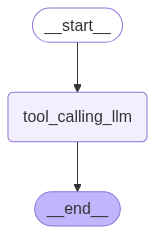

In [19]:
from langgraph.graph import START,END
#building nodes and edges
graph.add_node(node="tool_calling_llm",action=tool_calling_llm)

#adding edges to graph.
graph.add_edge(START,"tool_calling_llm")
graph.add_edge('tool_calling_llm',END)

graph.compile()

In [20]:
#worklfow.
workflow = graph.compile()

In [21]:
messages = workflow.invoke({"messages": HumanMessage(content="Hello!")})
messages

{'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='89894a70-24c7-4d6c-8ac9-95a14991652e'),
  AIMessage(content='Hi there! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 53, 'total_tokens': 64, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CGNNIy8QXsVSUCSqg93SGlB7TwTjZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--dc26095f-3a5c-4bbc-91b6-2cb33caf2f61-0', usage_metadata={'input_tokens': 53, 'output_tokens': 11, 'total_tokens': 64, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [22]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hi there! How can I assist you today?


## how automatically llm will call tools

In [24]:
messages = workflow.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiplication (call_tYKx4KpQrInV1kr3zHYJ1N4m)
 Call ID: call_tYKx4KpQrInV1kr3zHYJ1N4m
  Args:
    a: 2
    b: 3
